In [571]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [572]:
#Reading csv
dataset = pd.read_csv("windstorm.csv")

In [573]:
dataset.head()

,country,temperature,pressure,WindSpeed3pm,WindSpeed5pm,windgustspeed,Windstorm,hours
0,GB,40.98,1005.21,20.0,6.0,30,no,5
1,GB,40.98,1005.21,17.0,4.0,39,yes,5
2,GB,40.98,1005.21,6.0,6.0,85,yes,1
3,GB,42.75,1023.25,24.0,30.0,54,yes,3
4,GB,42.75,1023.25,28.0,20.0,50,yes,3


In [574]:
dataset.apply(lambda x : sum(x.isnull()),axis = 0)

country          0
temperature      0
pressure         0
WindSpeed3pm     0
WindSpeed5pm     0
windgustspeed    0
Windstorm        0
hours            0
dtype: int64

In [575]:
dataset.describe()

,temperature,pressure,WindSpeed3pm,WindSpeed5pm,windgustspeed,hours
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,57.214987,1004.257393,17.985815,9.572639,40.110276,4.145363
std,7.922587,11.790178,8.481866,7.571792,13.208147,1.097701
min,38.800000,943.240000,0.000000,0.000000,13.000000,0.000000
25%,49.940000,999.290000,11.000000,6.000000,31.000000,4.000000
50%,58.850000,1003.700000,17.980000,7.000000,39.000000,4.000000
75%,63.280000,1015.760000,24.000000,11.000000,46.000000,5.000000
max,71.790000,1034.210000,52.000000,41.000000,98.000000,6.000000


---------------Splitting the Fields-------------------------

In [576]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['hours','windgustspeed']].values

------------------EDA ANALYSIS-----------------------------

In [577]:
import statsmodels.api as sm
model1 = sm.OLS(y, x).fit()
predictions = model1.predict(x)
model1.summary()

ValueError: shapes (399,2) and (399,2) not aligned: 2 (dim 1) != 399 (dim 0)

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(dataset.corr(), annot=True, fmt=".1f")
plt.show()

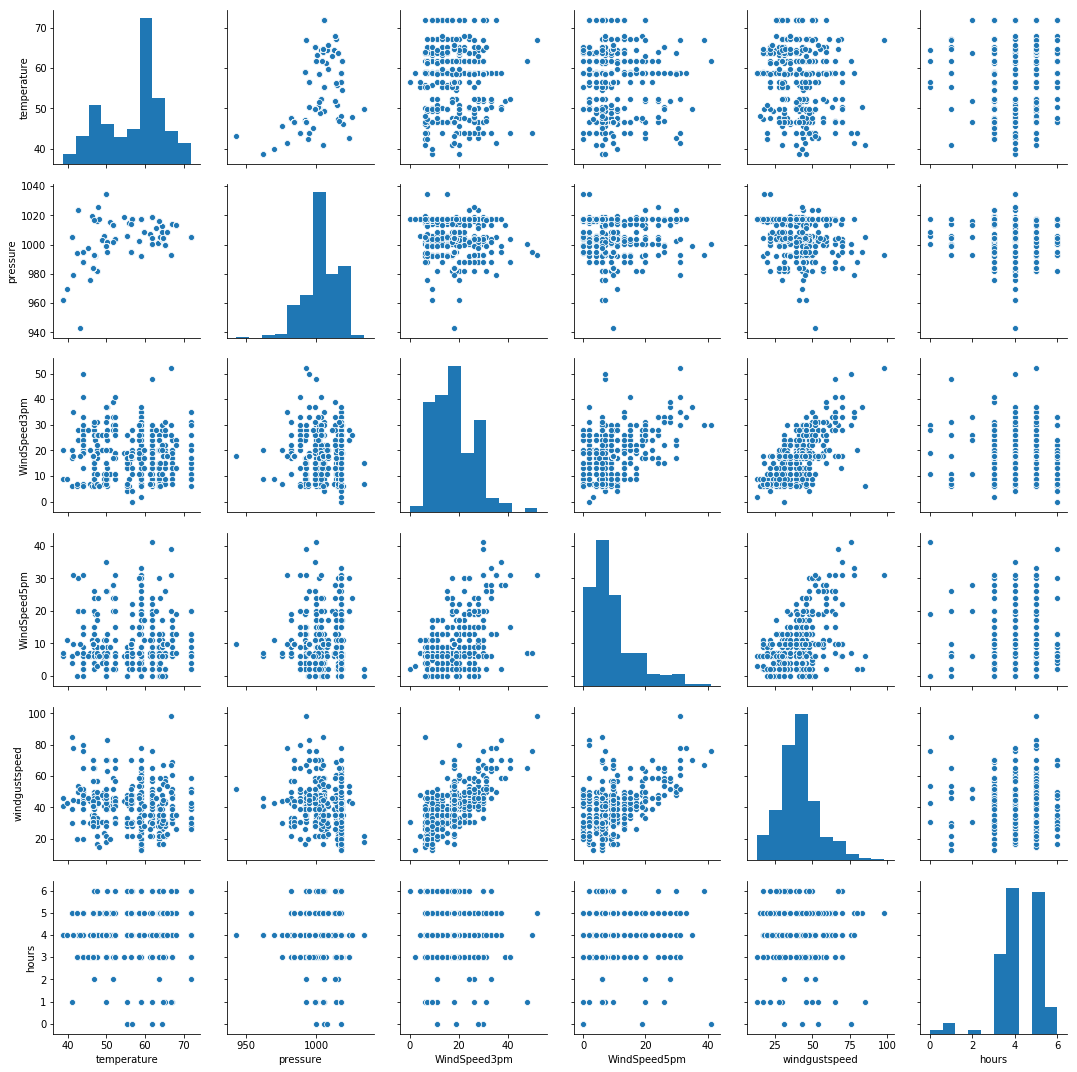

In [578]:
import seaborn as sns
sns.pairplot(dataset)

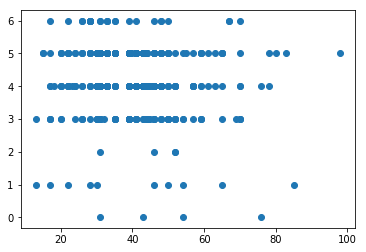

In [579]:
plt.scatter(dataset['windgustspeed'],dataset['hours'])

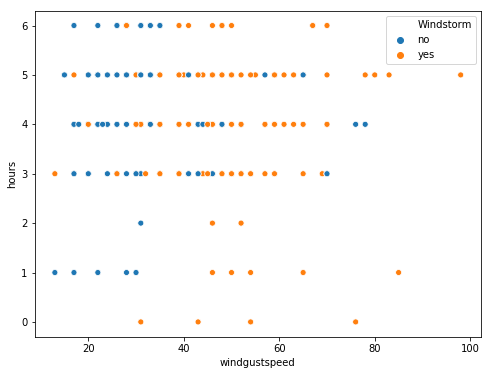

In [580]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'windgustspeed', y = 'hours', hue="Windstorm", data = dataset)

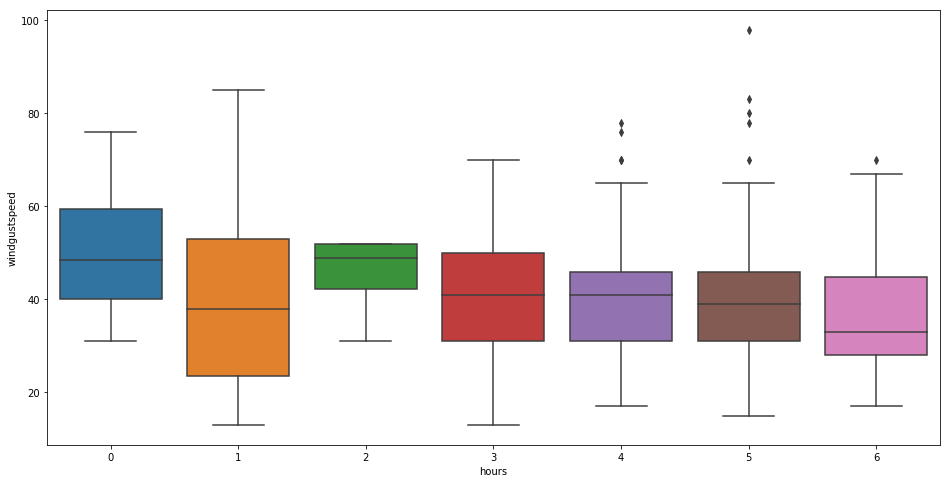

In [581]:
plt.figure(figsize = (16, 8))
sns.boxplot(x='hours', y='windgustspeed', data=dataset)

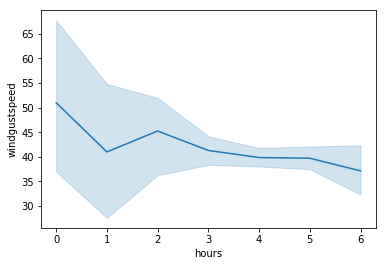

In [582]:
sns.lineplot(x="hours",y="windgustspeed", data=dataset)


------------------MODELLING--------------------------

------------------------1.Simple Linear Regression------------------------

In [583]:
x = dataset[['WindSpeed3pm']].values
y = dataset[['windgustspeed']].values

In [584]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 2)

In [585]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [586]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(x_train , y_train)


accuracy = model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)


Accuracy of the model: 0.5014995156917752


In [587]:
ypred = model.predict(x_test)

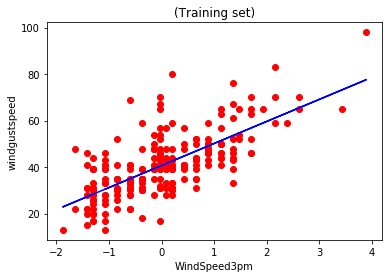

In [588]:
# Visualising the Train set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('(Training set)')
plt.xlabel('WindSpeed3pm')
plt.ylabel('windgustspeed')
plt.show()


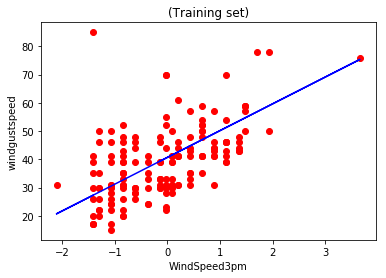

In [589]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, model.predict(x_test), color = 'blue')
plt.title('(Training set)')
plt.xlabel('WindSpeed3pm')
plt.ylabel('windgustspeed')
plt.show()


In [590]:
#assgning the values in x to predict y vlaues....
x2 = np.array([[2.5],[3.2],[4.1],[4.8],[5.3],[8.2],[12.0],[12.5],[15.2],[16.2]])
y2=model.predict(x2)

yd=pd.DataFrame(y2)

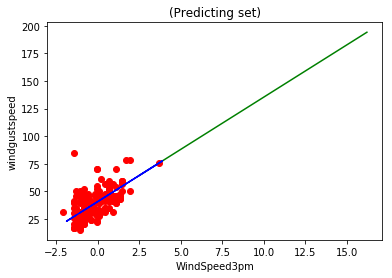

array([[ 64.38283352],
       [ 71.01789301],
       [ 79.54868379],
       [ 86.18374328],
       [ 90.92307149],
       [118.41117511],
       [154.4300695 ],
       [159.16939771],
       [184.76177005],
       [194.24042647]])

In [591]:
# Visualising the Predict set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x2,y2, color = 'green')
plt.plot(x_train,model.predict(x_train), color = 'blue')
plt.title('(Predicting set)')
plt.xlabel('WindSpeed3pm')
plt.ylabel('windgustspeed')
plt.show()
y2

In [592]:
#Accuracy
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.3057318866207245

In [593]:
# #Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
# x = dataset[['WindSpeed3pm']].values
# y = dataset[['hours']].values

# x = (x - x.mean()) / x.std()
# x = np.c_[np.ones(x.shape[0]), x] 
# #GRADIENT DESCENT

# alpha = 0.01 #Step size
# iterations = 2000 #No. of iterations
# m = y.size #No. of data points
# np.random.seed(123) #Set the seed
# theta = np.random.rand(2) #Pick some random values to start with


# #GRADIENT DESCENT
# def gradient_descent(x, y, theta, iterations, alpha):
#     past_costs = []
#     past_thetas = [theta]
#     for i in range(iterations):
#         prediction = np.dot(x, theta)
#         error = prediction - y
#         cost = 1/(2*m) * np.dot(error.T, error)
#         past_costs.append(cost)
#         theta = theta - (alpha * (1/m) * np.dot(x.T, error))
#         past_thetas.append(theta)
        
#     return past_thetas, past_costs

# #Pass the relevant variables to the function and get the new values back...
# past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
# theta = past_thetas[-1]

# #Print the results...
# print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

In [594]:
# #Plot the cost function...
# plt.title('Cost Function J')
# plt.xlabel('No. of iterations')
# plt.ylabel('Cost')
# plt.plot(past_costs)
# plt.show()


------------------2.MultiLinear Regression----------------------------

In [595]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['hours','windgustspeed']].values

In [596]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [597]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [598]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(x_train , y_train)


accuracy = model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)


Accuracy of the model: 0.5100776244358226


In [599]:
ypred = model.predict(x_test)

In [600]:
print('Variance score: %.2f' % model.score(x_test, y_test))
#keeping the Accuracy of Traning set Model constant to Linear regression Accuracy of the Testing is Increased

Variance score: 0.49


-------------------------3. Stepwise Regression-------------------------

    (i).Considering  windgustspeed column

In [601]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['windgustspeed']].values

In [602]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Read data
df = pd.read_csv('windstorm.csv')

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (279, 4) (279,)
Testing dataset shape: (120, 4) (120,)


In [603]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (m

In [604]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3]


In [605]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(x_train[:, feat_cols], y_train)

y_train_pred = clf.predict(x_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(x_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))
 

Training accuracy on selected features: 0.491
Testing accuracy on selected features: 0.100


In [606]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(x_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))
 

Training accuracy on all features: 0.491
Testing accuracy on all features: 0.100


(ii).Considering Hours column

In [607]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['hours']].values

In [608]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Read data
df = pd.read_csv('windstorm.csv')

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (279, 4) (279,)
Testing dataset shape: (120, 4) (120,)


In [609]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)
#sfs1 = sfs1.fit(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program files(NOn andriod)\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (m

In [610]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3]


In [611]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(x_train[:, feat_cols], y_train)

y_train_pred = clf.predict(x_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(x_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))
 

Training accuracy on selected features: 0.573
Testing accuracy on selected features: 0.358


In [612]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(x_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))
 

Training accuracy on all features: 0.573
Testing accuracy on all features: 0.358


--------------------------END----------------------